In [1]:
import cv2
import numpy as np
import pytesseract as tess
from matplotlib import pyplot as plt

In [2]:
import Levenshtein as lev
from skimage.filters.rank import entropy
from pytesseract import Output

### Standard PDF Digital Image

In [3]:
imgPDF = cv2.imread('./../samples/imgPDF.png')
imgPDF.shape

(1770, 1270, 3)

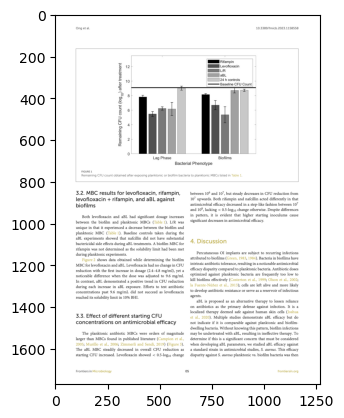

In [4]:
plt.imshow(imgPDF)

In [5]:
GT = tess.image_to_string(imgPDF)
print(GT)

Ong et al.

10.3389/fmicb.2023.1158558

Rifampin
EE Levofloxacin
GLR
BL

24 h controls
Baseline CFU Count

Biofilms

Bacterial Phenotype

& 12
FS
©
g
= 10
£
‘Ss 1
<)
ao 8
2
5
3 6
8
b=)
im
O 4
D
]
=
©
E 2
[a]
ow

i?)

Lag Phase
FIGURE 1
Remaining CFU count obtained after exposing planktonic or biofilm bacteria to planktonic MBCs listed in Table 1.

3.2. MBC results for levofloxacin, rifampin,
levofloxacin + rifampin, and aBL against
biofilms

Both levofloxacin and aBL had significant dosage increases
between the biofilm and planktonic MBCs (Table 1). L/R was
unique in that it experienced a decrease between the biofilm and
planktonic MBC (Table 1). Baseline controls taken during the
aBL experiments showed that nafcillin did not have substantial
bactericidal side effects during aBL treatments. A biofilm MBC for
rifampin was not determined as the solubility limit had been met
during planktonic experiments.

Figure 2 shows data obtained while determining the biofilm
MBC for levofloxacin and

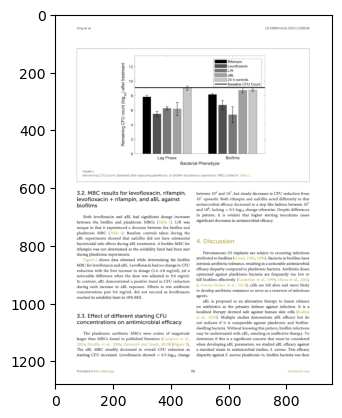

In [17]:
imgPDF = cv2.resize(imgPDF, (int(480*2), int(640*2)))
plt.imshow(imgPDF)

In [18]:
GT1 = tess.image_to_string(imgPDF)
print(GT1)

Ong et at.

10.3389/fmicb.2023.1158558

12

10

Remaining CFU count (log, ) after treatment

Lag Phase

Rifampin
HE Levofloxacin
|

aBL

(ES 24 h controts
Baseline CFU Count

Biofilms

Bacterial Phenotype

Remaining CFU count obtained after exposing planktonic or biofilm bacteria to planktonic MBCS listed in Table 1

3.2. MBC results for levofloxacin, rifampin,
+ rifampin, and aBL against

Both levofloxacin and aBL had significant dosage increases
between the biofilm and planktonic MBCs (Table |). L/R was
unique in that it experienced a decrease between the biofilm and
planktonic MBC (‘able 1). Baseline controls taken during the
aBL experiments showed that nafcillin did not have substantial
bactericidal side effects during aBL treatments. A biofilm MBC for
rifampin was not determined as the solubility limit had been met
during planktonic experiments.

Figure 2 shows data obtained while determining the biofilm
MBC for levofloxacin and aBL. Levofloxacin had no change in CFU
reduction wit

In [21]:
lev.distance(GT,GT1)

205

In [19]:
lev.distance(GT,GT1)/max(len(GT),len(GT1))*100

5.8421202621829575

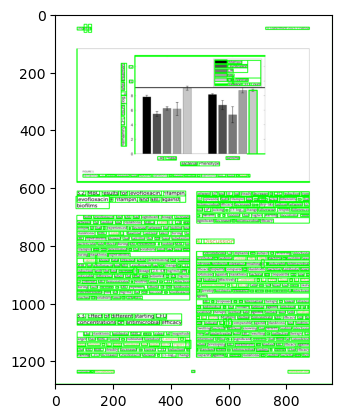

In [20]:
img = imgPDF.copy()
d = tess.image_to_data(img, output_type=tess.Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)

### UnWarped

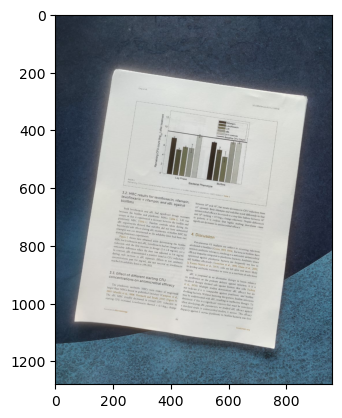

In [22]:
img = cv2.imread("./../samples/img.jpeg")
plt.imshow(img)

In [24]:
W0 = tess.image_to_string(img)
W0

'REE Riri,\n\nferent\n\nStarting cry\nimicrobial\n\nefficacy\n\n'

In [25]:
lev.distance(GT,W0),lev.distance(GT,W0)/len(GT)*100

(3455, 98.46110002849815)

### Simple Warped

In [26]:
def drawRec(biggestNew, mainFrame):
        cv2.line(mainFrame, (biggestNew[0][0][0], biggestNew[0][0][1]), (biggestNew[1][0][0], biggestNew[1][0][1]), (0, 255, 0), 20)
        cv2.line(mainFrame, (biggestNew[0][0][0], biggestNew[0][0][1]), (biggestNew[2][0][0], biggestNew[2][0][1]), (0, 255, 0), 20)
        cv2.line(mainFrame, (biggestNew[3][0][0], biggestNew[3][0][1]), (biggestNew[2][0][0], biggestNew[2][0][1]), (0, 255, 0), 20)
        cv2.line(mainFrame, (biggestNew[3][0][0], biggestNew[3][0][1]), (biggestNew[1][0][0], biggestNew[1][0][1]), (0, 255, 0), 20)

In [27]:
#initializing
img = cv2.resize(img, (int(480*2), int(640*2)))
w, h = 480, 640
imgWarp = img.copy()

# detect frame
GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
BlurredFrame = cv2.GaussianBlur(GrayImg, (5, 5), 1)
CannyFrame = cv2.Canny(BlurredFrame, 190, 190)
contours, _ = cv2.findContours(CannyFrame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ContourFrame = img.copy()
ContourFrame = cv2.drawContours(ContourFrame, contours, -1, (255, 0, 255), 4)

CornerFrame = img.copy()
maxArea = 0
biggest = []
for i in contours :
    area = cv2.contourArea(i)
    if area > 500 :
        peri = cv2.arcLength(i, True)
        edges = cv2.approxPolyDP(i, 0.02*peri, True)
        if area > maxArea and len(edges) == 4 :
            biggest = edges
            maxArea = area
if len(biggest) != 0 :
   # drawRec(biggest, CornerFrame)
    biggest = biggest.reshape((4, 2))
    biggestNew = np.zeros((4, 1, 2), dtype= np.int32)
    add = biggest.sum(1)
    biggestNew[0] = biggest[np.argmin(add)]
    biggestNew[3] = biggest[np.argmax(add)]
    dif = np.diff(biggest, axis = 1)
    biggestNew[1] = biggest[np.argmin(dif)]
    biggestNew[2] = biggest[np.argmax(dif)]
    drawRec(biggestNew, CornerFrame)
    CornerFrame = cv2.drawContours(CornerFrame, biggestNew, -1, (255, 0, 255), 25)
    pts1 = np.float32(biggestNew)
    pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgWarp = cv2.warpPerspective(img, matrix, (w, h))


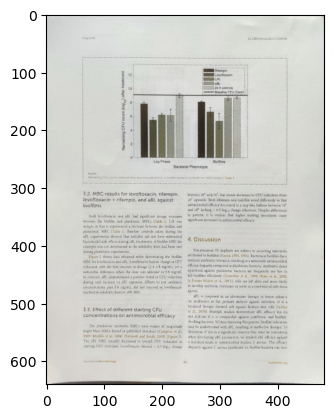

In [28]:
plt.imshow(imgWarp)

In [29]:
W1 = tess.image_to_string(img)
W1

'REE Riri,\n\nferent\n\nStarting cry\nimicrobial\n\nefficacy\n\n'

In [30]:
lev.distance(GT,W1),lev.distance(GT,W1)/len(GT)*100

(3455, 98.46110002849815)

In [31]:
plt.imsave('./../samples/ImgWarp.jpeg',imgWarp)

In [32]:
imgWarp.shape

(640, 480, 3)

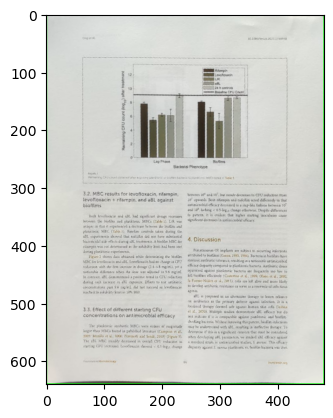

In [34]:
img = imgWarp.copy()
d = tess.image_to_data(img, output_type=tess.Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)

### Image SuperRes Warped

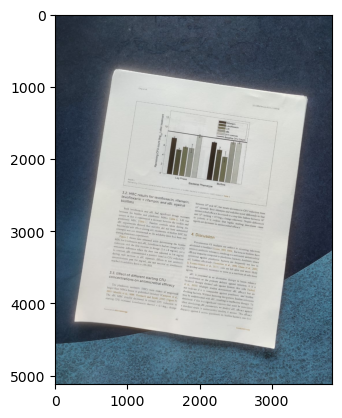

In [35]:
img = cv2.imread("./../samples/imgRes.jpg")
plt.imshow(img)

In [36]:
#initializing
img = cv2.resize(img, (int(480*2), int(640*2)))
w, h = 480, 640
imgWarp = img.copy()

# detect frame
GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
BlurredFrame = cv2.GaussianBlur(GrayImg, (5, 5), 1)
CannyFrame = cv2.Canny(BlurredFrame, 190, 190)
contours, _ = cv2.findContours(CannyFrame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ContourFrame = img.copy()
ContourFrame = cv2.drawContours(ContourFrame, contours, -1, (255, 0, 255), 4)

CornerFrame = img.copy()
maxArea = 0
biggest = []
for i in contours :
    area = cv2.contourArea(i)
    if area > 500 :
        peri = cv2.arcLength(i, True)
        edges = cv2.approxPolyDP(i, 0.02*peri, True)
        if area > maxArea and len(edges) == 4 :
            biggest = edges
            maxArea = area
if len(biggest) != 0 :
   # drawRec(biggest, CornerFrame)
    biggest = biggest.reshape((4, 2))
    biggestNew = np.zeros((4, 1, 2), dtype= np.int32)
    add = biggest.sum(1)
    biggestNew[0] = biggest[np.argmin(add)]
    biggestNew[3] = biggest[np.argmax(add)]
    dif = np.diff(biggest, axis = 1)
    biggestNew[1] = biggest[np.argmin(dif)]
    biggestNew[2] = biggest[np.argmax(dif)]
    drawRec(biggestNew, CornerFrame)
    CornerFrame = cv2.drawContours(CornerFrame, biggestNew, -1, (255, 0, 255), 25)
    pts1 = np.float32(biggestNew)
    pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgWarp = cv2.warpPerspective(img, matrix, (w, h))

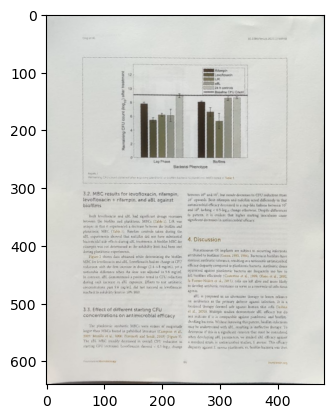

In [37]:
plt.imshow(imgWarp)

In [38]:
W2 = tess.image_to_string(imgWarp)
W2

''

In [39]:
lev.distance(GT,W2),lev.distance(GT,W2)/len(GT)*100

(3509, 100.0)

### Warped SuperRes

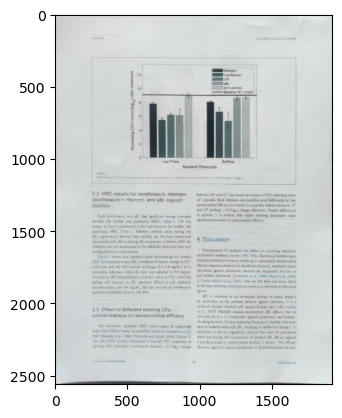

In [40]:
img = cv2.imread("./../samples/WarpedRes.jpg")
plt.imshow(img)

In [42]:
W3 = tess.image_to_string(img)
W3

'3.2 NGC results for iewotlomacin, rifmenpien.\nlewofionecin + ctarmpin, anc aBl agivianant\noilatadf tora\n\nSeal Levaiieectn ord a0 beet eqaticoett drags teereas\nlortnen Uke Pividin aed plabicese MNCe | [dbl |) LD war\nateepee a8 Cher it eeperenced & decrease hetreien Lier beetien one\nplokienk MBC (iabke |) Seach contre tuben docme tin\n1B) caperenenie sheqed (het neti did com hover anlertasital\n(encte re wha) edbe-refiec alaeeeg afl trewtenrmen A bere lin WLC dae\nLQAETEPIR eee Fer pcaass (er adh te ernult poacher att\ndona Petter op\n\nPigare 1! sheen lait Ghiensd while deterpising (he belle\nATH nt eee ther emet eae a Leerethamee ie Rad ed haeege ot CPI!\nfeetien wit the fire uncemee in domage (4-48 mero) peta\nontiowahee Uflewerce mteem (he deme ee adpasted be OO mgieel\nfm cero, al demersivaied 2 peter ep (9 LY elects\nchirtmag cmth ine reaee ca a) coppers. oct bo fed aatibetlie\n(eromimiars qa ®eld, Gd get need et Werte\nmacho re wababibry Sener ty 10% F(T\n\n3.3. Effect of 

In [ ]:
lev.distance(GT,W3),lev.distance(GT,W3)/len(GT)*100

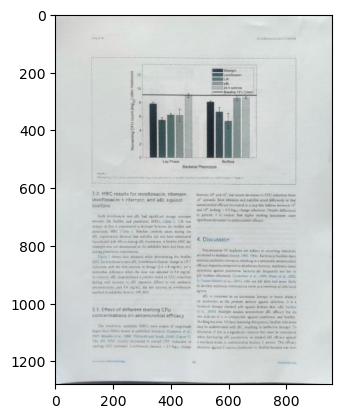

In [43]:
img = cv2.resize(img, (int(480*2), int(640*2)))
plt.imshow(img)

In [44]:
W4 = tess.image_to_string(img)
W4

'3.2. NBC results for tevatioxacin, rifampin\nlevofloxacin + rifampin, and aBL ogainet\nblafiims\n\nSen Levalioeadin wed aC ed gait deuage recreaney\nlorem lhe Pvt md plarbiveie SBCA (lable |) LAK ean\nexpeneners a decrease hetwern tbe laufibn sae\npisnitonk MIC (Table |) Hatch saeioale taken ducing thr\nADL eapermmenix showed (het rile id com have anletastist\nref seep ill trentsermne. bondi MIC. dar\nNeeie expe\nshor ait dotaned bile Seiernuning lhe binblie\nsnl SP Lerten Rad nt haaegn oa CPP\nim income in dag (24-4 rngyinl) pot\n\naga om to\n\nctaray ph\n\nViger\nAIDC har eww\nfedoemen, id\nustasrabie bere\n\nfm eareart aL demonstrated 2 prunsiee tend\nchurtag ath toa rezse cu aD copppwise W6eté tn feat antibie\nConematratears past 46 tuple. id net creed a erstinnacie\n\nbby ent 30% HUT\n\nached\n\n3.3. Effect of different starting CFU\nconcentrations on antimecrobial efficacy\n\nToe plaisir anemic MAES were marian a rengritials\n\nbern (fa 10, beat caenche decreases tn COU pnductoo

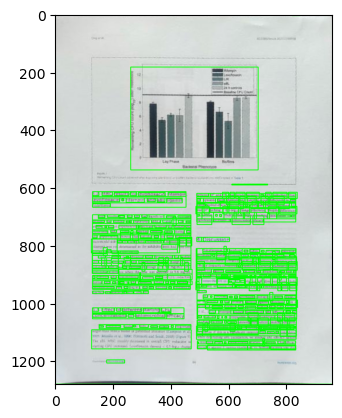

In [45]:
img1 = img.copy()
d = tess.image_to_data(img1, output_type=tess.Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img1)

In [46]:
lev.distance(GT,W4),lev.distance(GT,W4)/len(GT)*100

(2153, 61.356511826731264)

### Warped LANCZOS

In [ ]:
from PIL import Image
img = Image.open("./../samples/ImgWarp.jpeg")
img

In [ ]:
width, height = img.size
new_size = width*6, height*6
img = img.resize(new_size, Image.LANCZOS)
img = img.convert('L')
img = img.point(lambda x: 0 if x < 155 else 255, '1')
img

In [ ]:
W5 = tess.image_to_string(img)
W5

In [ ]:
lev.distance(GT,W5),lev.distance(GT,W5)/len(GT)*100

### Warped SuperRes LANCZOS

In [ ]:
img = Image.open("./../samples/WarpedRes.jpg")
img

In [ ]:
width, height = img.size
new_size = width*4, height*4
img = img.resize(new_size, Image.LANCZOS)
img = img.convert('L')
img = img.point(lambda x: 0 if x < 155 else 255, '1')
img

In [ ]:
W6 = tess.image_to_string(img)
W6

In [ ]:
lev.distance(GT,W6),lev.distance(GT,W6)/len(GT)*100

DPI  taking from 60 to 400
OCR Evaluation Score Improvement
Take a best possible picture and try on it.